## IMPLICATION OF DELINQUENCY ON LENDER YIELD IN PROSPER LOANS

## Investigation Overview 
In this investigation, I wanted to focus on the effects delinquency may have on lender's yield.Does it reduce or increase the profit of the lender?.

## Dataset Overview
The dataset contains attributes of 113000+ borrowers from Prosper Loans and 81 variables. I streamlined the variables to my question and work with 27 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
viz_df = pd.read_csv('visuals1.csv')
viz = pd.read_csv('visuals.csv')

In [3]:
viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 17438 non-null  object 
 1   MemberKey                  17438 non-null  object 
 2   BorrowerStateCode          17438 non-null  object 
 3   Occupation                 16968 non-null  object 
 4   EmploymentStatus           16981 non-null  object 
 5   EmploymentStatusDuration   15389 non-null  float64
 6   IsBorrowerHomeowner        17438 non-null  bool   
 7   ListingCategory            17438 non-null  object 
 8   CurrentDelinquencies       17396 non-null  float64
 9   LoanOriginationDate        17438 non-null  object 
 10  BorrowerRate               17438 non-null  float64
 11  MonthlyLoanPayment         17438 non-null  float64
 12  LoanOriginalAmount         17438 non-null  int64  
 13  AmountDelinquent           15389 non-null  flo

In [4]:
# change date datatype to datetime
viz['LoanOriginationDate'] = viz['LoanOriginationDate'].apply(pd.to_datetime)

In [5]:
def custom_plot(xlabel, ylabel, title, figsize=(8, 6), xy_fontsize=12, title_fontsize=14, title_pad=1.0):
    """
    A custom function to create a plot with specified xlabel, ylabel, title, 
    figsize, and fontsize for the labels and title, and the distance between the plot title and the plot.
    """
    # create the figure object with the specified figsize
    fig, ax = plt.subplots(figsize=figsize)
    
    # set the xlabel and ylabel of the plot with the specified fontsize
    ax.set_xlabel(xlabel, fontsize=xy_fontsize)
    ax.set_ylabel(ylabel, fontsize=xy_fontsize)
    
    # set the title of the plot with the specified fontsize and distance between title and plot
    ax.set_title(title, fontsize=title_fontsize, y=1.0+title_pad)
    
    # return the figure and axes objects
    return fig, ax

## Distribution of Loan status of overall population of borrowers

83.8% of borrowers are in good standing which is good for Prosper Loans. Let's zoom into the 14.3% defaulted borrowers and 1.9% delinquent borrowers.

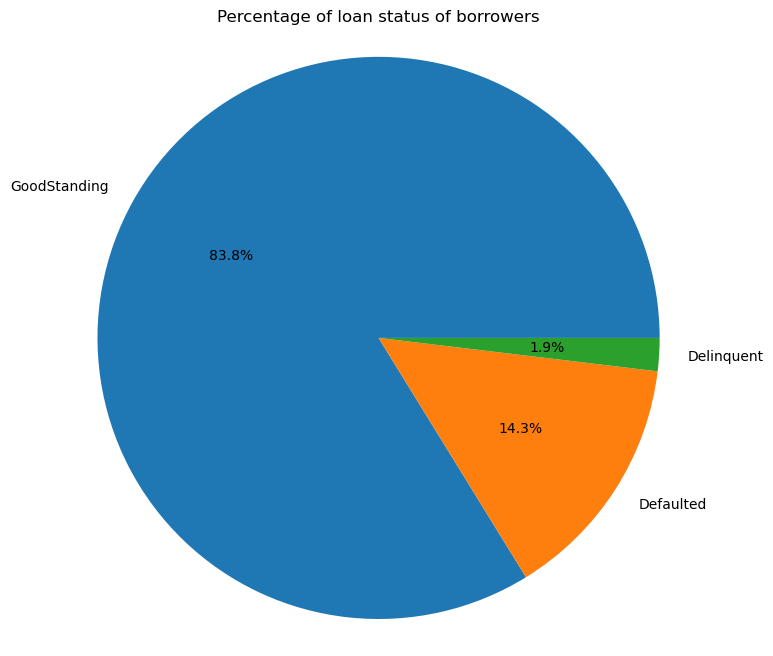

In [6]:
viz_df['NewLoanStatus'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (8,8))
plt.title('Percentage of loan status of borrowers')
# Set the aspect ratio to be equal
plt.axis('equal')
# Remove the label for the y-axis
plt.ylabel('');

### The plots coming till the end will focus on delinquent and defaulted borrowers. I will refer to these borrowers  as defaulters

## Distribution of monthly income 

The monthly income of defaulters peak between 4000 - 5000USD.

According to the Bureau of Labor Statistics (BLS), the average annual expenditure per consumer unit (which includes households and single persons living alone) in the United States was $68,703 in 2020. This will make the monthly average to be 5725.25USD. 
The monthly distribution of defaulters id below the average expenditure as stated by BLS.

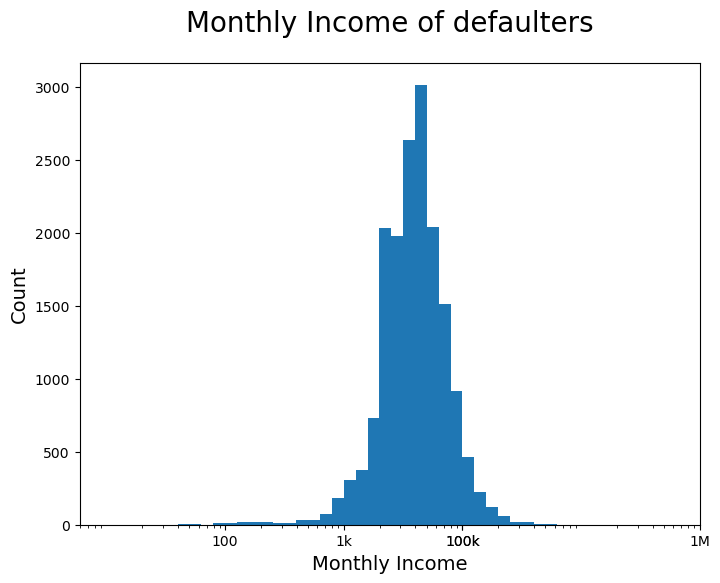

In [7]:
fig, ax = custom_plot(xlabel='Monthly Income', ylabel='Count', 
                      title='Monthly Income of defaulters', figsize=(8, 6), xy_fontsize=14, 
                      title_fontsize=20, title_pad= 0.05)

bins = 10 ** np.arange(1, 5.5+0.1, 0.1)

plt.hist(data = viz, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([10e1, 10e2, 10e3, 1e4, 10e5], 
           ['100', '1k', '10k', '100k', '1M']);


## Distribution of listing category 

33.4% of borrowers get money to consolidate debts. 

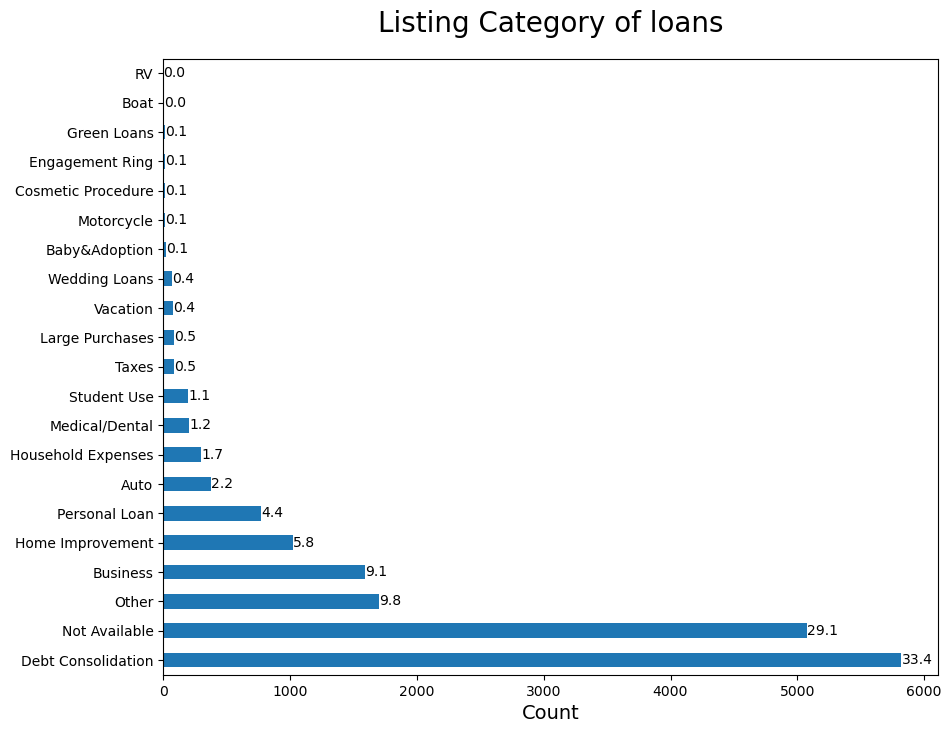

In [8]:
type_counts = viz['ListingCategory'].value_counts()
# Returns the sum of all not-null values in `type` column
n_listing = viz['ListingCategory'].value_counts().sum()

fig, ax = custom_plot(xlabel='Count', ylabel='', 
                      title='Listing Category of loans', figsize=(10, 8), xy_fontsize=14, 
                      title_fontsize=20, title_pad= 0.03)


viz['ListingCategory'].value_counts().plot(kind = 'barh');

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_listing)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

## Lender yield by borrower rate

There is a strong positive correlation between lender yield and interest rate. So can delinquency or default in loan payment make the lender yield to reduce?

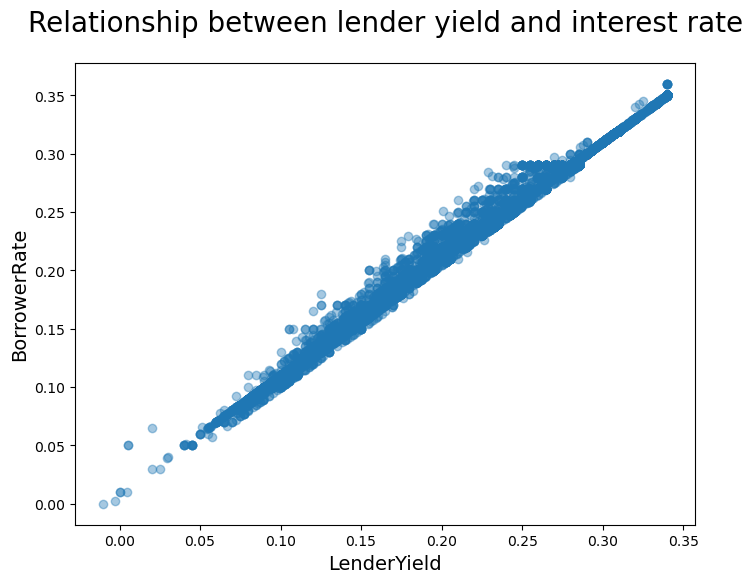

In [9]:
fig, ax = custom_plot(xlabel='LenderYield', ylabel='BorrowerRate', 
                      title='Relationship between lender yield and interest rate', figsize=(8, 6), xy_fontsize=14, 
                      title_fontsize=20, title_pad= 0.05)
 
plt.scatter(data = viz, x = 'LenderYield', y = 'BorrowerRate',alpha = 0.4);

## Lender yield by delinquencies in last 7 years

There is a weak positive correlation between lender yield and delinquencies. The effect of delinquency/default on lenders yield is such that the lender earning is not as much compared to if the payment was timely.

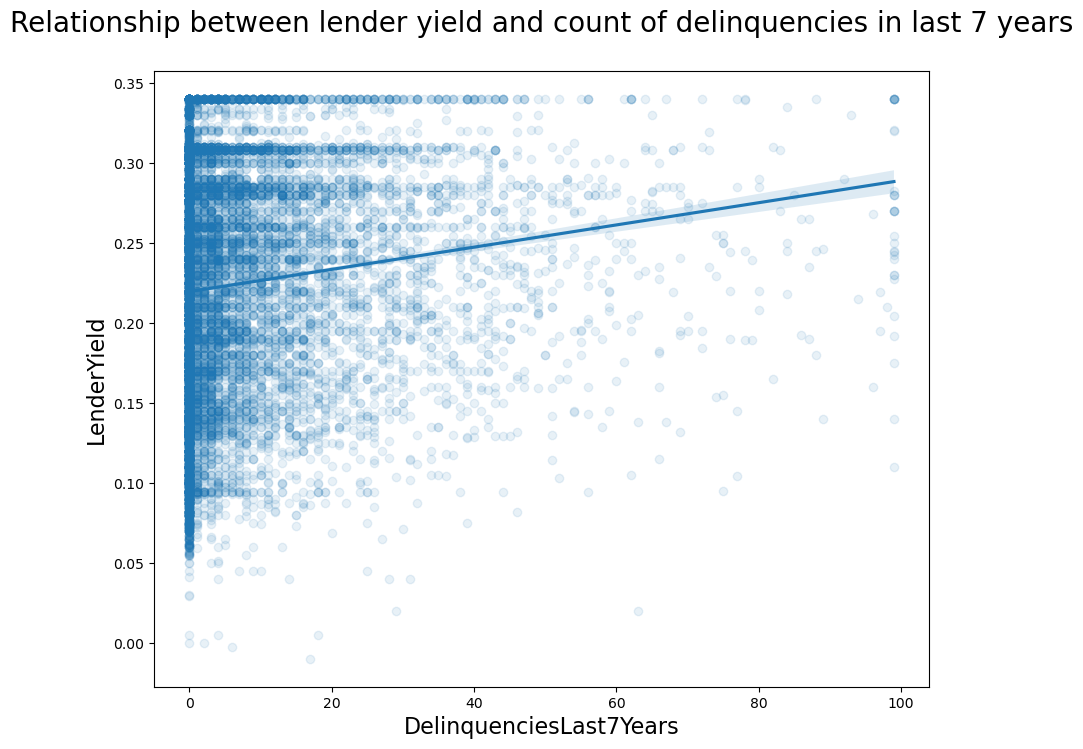

In [10]:
fig, ax = custom_plot(xlabel='DelinquenciesLast7Years', ylabel='LenderYield', 
                      title='Relationship between lender yield and count of delinquencies in last 7 years', figsize=(10, 8), xy_fontsize=16, 
                      title_fontsize=20, title_pad = 0.05)

sb.regplot(data = viz, x = 'DelinquenciesLast7Years', y = 'LenderYield', scatter_kws={'alpha': 0.1});

## Loan status and amount over years

This plot shows the rise and fall in loan amount given to borrowers in the first few years after inception of which after that there has been a steady increase in the amount of loan given to borrowers. And also as the loan amount increases over the years, so does the number of delinquent and defaulted borrowers.

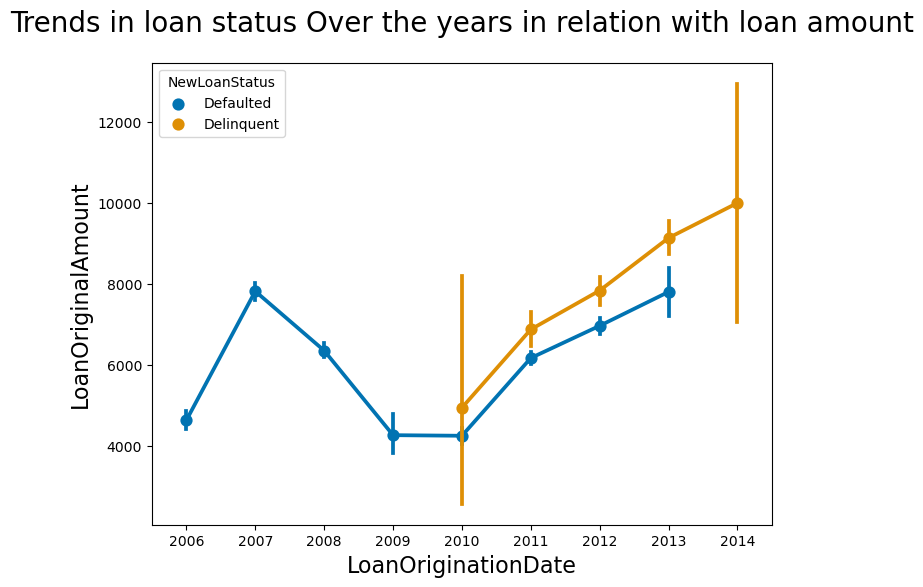

In [11]:
fig, ax = custom_plot(xlabel='Year', ylabel='Loan Amount', 
                      title='Trends in loan status Over the years in relation with loan amount', figsize=(8, 6), xy_fontsize=16, 
                      title_fontsize=20, title_pad=0.05)

sb.pointplot(data = viz, x = viz['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'NewLoanStatus', 
             palette = 'colorblind');

#                                     Thank you